In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import math

# first load the data
data = fetch_california_housing(as_frame =True)
df = data.frame
x = df["HouseAge"].values # we are taking simple linear regression taking only single feature
y = df["MedHouseVal"].values

m = x.shape[0]




In [7]:
#normalization of x

x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std


In [8]:
def compute_dw_db(x, y, w, b):
  m = x.shape[0]
  fw_b = w * x + b
  j_wb = (1/(2*m)) * np.sum((fw_b - y)**2)
  dj_dw = 1/m * np.dot(fw_b - y, x)
  dj_db = 1/m * np.sum(fw_b - y)

  return dj_dw, dj_db


def compute_j_wb(x, y, w, b):
  m = x.shape[0]
  fw_b = w * x + b
  j_wb = (1/(2*m)) * np.sum((fw_b - y)**2)

  return j_wb




In [9]:
# now we need to calculate the final value for w and b

def compute_final_w_b(x, y, w_in, b_in, alpha, iter):
  w = w_in
  b = b_in
  j_w_b_list = []
  collect_w = []
  for i in range(0, iter, 50):
   j_w_b_list.append(float(compute_j_wb(x_used, y, w, b)))
   dj_dw, dj_db = compute_dw_db(x, y, w, b)
   w = w - alpha * dj_dw
   b = b - alpha * dj_db
   collect_w.append(float(w))

  return w, b, collect_w, j_w_b_list


the final value of w is - 0.12166281177069747 and b is - 2.064840948753322


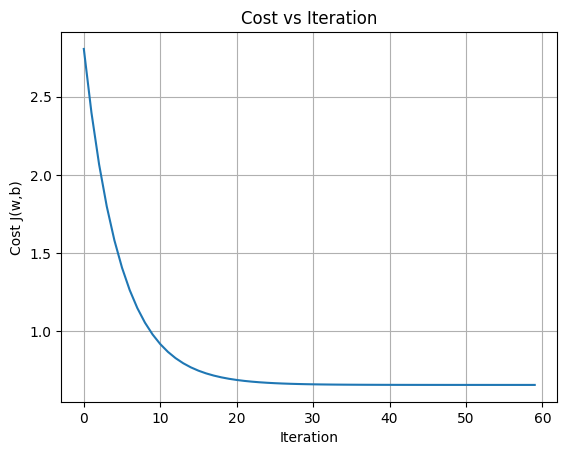

In [15]:
# run the gradient here and plot the values J(w,b) vs w keepling b constant just to show the parabola function


x_used = x_norm
alpha = 0.1
iter = 3000

w_final, b_final, w_collect, j_w_b_list = compute_final_w_b(x_used, y, 0.0, 0.0, alpha, iter)

print(f"the final value of w is - {w_final} and b is - {b_final}")

w_values = np.linspace(w_final-5, w_final + 5, 200)
jwb_collect = [compute_j_wb(x_used, y, w, b_final) for w in w_values]

plt.plot(j_w_b_list)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Iteration")
plt.grid(True)
plt.show()


#The cost decreases rapidly at first and then plateaus, indicating convergence.
